In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
input_data="sample.csv"
in1_df=pd.read_csv(input_data)
in1_df

Country  Population  Literacy  Schooling  \
0                    Algeria    42972878      81.4         14   
1                    Bolivia    11639909      92.5         14   
2                   Cambodia    16926984      80.5         11   
3                   Eswatini     1104479      88.4         11   
4                     Jordan    10820644      98.2         13   
5                  Lithuania     2731464      99.8         16   
6                       Peru    31914989      94.4         15   
7                     Serbia     7012165      98.3         15   
8                    Tunisia    11721177      89.6         15   
9                     Turkey    82017514      96.2         18   
10                    Uganda    43252966      76.5         10   
11             United States   332639102      99.0         16   
12                    Angola    35522339      71.1         10   
13                Bangladesh   162650853      73.9         11   
14                   Belarus     9477918      99.8         15   
15  Central African Republic     5990855      37.4          7   
16                  Colombia    49084841      95.1         15   
17                 Indonesia   267026366      95.7         13   
18                      Laos     7447396      84.7         11   
19                   Lesotho     1969334      79.4         11   
20                     Nepal    30327877      67.9         12   
21                     Qatar     2444174      93.5         12   
22                   Ukraine    43922939      99.8         15   
23                 Venezuela    28644603      97.1         14   

    Per_Cap_Inc_2017  GINI  Medical_Exp  Doctors  Hosp_Beds   Religion  \
0              15200  27.6          6.6     1.83       1.90     Muslim   
1               7600  44.0          6.9     1.61       1.10  Christian   
2               4000  30.8          6.1     0.17       0.80   Buddhist   
3              10100  51.5          7.7     0.08       2.10  Christian   
4               9200  33.7          5.5     2.34       1.40     Muslim   
5              32400  37.4          6.7     4.34       7.30  Christian   
6              13500  43.3          5.1     1.27       1.60  Christian   
7              15100  39.6          9.1     3.13       5.70  Christian   
8              11900  32.8          7.0     1.27       2.20     Muslim   
9              27000  41.9          4.3     1.76       2.70     Muslim   
10              2400  42.8          6.2     0.09       0.50  Christian   
11             59800  41.5         17.1     2.59       2.90  Christian   
12              6800  42.7          2.9     0.21       0.80  Christian   
13              4200  32.4          2.4     0.53       0.80     Muslim   
14             18900  25.4          6.3     4.08      11.00  Christian   
15               700  56.2          4.3     0.06       1.00  Christian   
16             14400  49.7          5.9     2.08       1.50  Christian   
17             12400  38.1          3.1     0.38       1.20     Muslim   
18              7400  36.4          2.4     0.50       1.50   Buddhist   
19              3300  54.2          8.1     0.07       1.30  Christian   
20              2700  32.8          6.3     0.65       3.00      Hindu   
21            124100  41.1          3.1     2.78       1.20     Muslim   
22              8800  25.0          6.7     3.01       8.80  Christian   
23             12500  46.9          3.2     1.92       0.08  Christian   

          Sect  Urbanization  Obseity  Infant_Mort  Mort_Under_5  Life_Exp  
0        Sunni          73.7     27.4         17.6         23.50      77.5  
1     Catholic          70.1     20.2         32.2         26.80      70.4  
2          NaN          24.2      3.9         43.7         28.00      65.9  
3          NaN          24.2     16.5         42.8         54.40      58.6  
4        Sunni          91.4     35.5         12.8         16.20      75.5  
5     Catholic          68.0     26.3          3.8          4.00      75.5  
6    

In [3]:
in_df=in1_df
m_u_5=in_df["Mort_Under_5"]
life_exp=in_df["Life_Exp"]
q5=m_u_5/1000
adj_le=round((life_exp-q5)/(1-q5),1)
# append adjusted life expectancy to panda
in_df["Adj_LE"]=adj_le
in_df.head()

Country  Population  Literacy  Schooling  Per_Cap_Inc_2017  GINI  \
0   Algeria    42972878      81.4         14             15200  27.6   
1   Bolivia    11639909      92.5         14              7600  44.0   
2  Cambodia    16926984      80.5         11              4000  30.8   
3  Eswatini     1104479      88.4         11             10100  51.5   
4    Jordan    10820644      98.2         13              9200  33.7   

   Medical_Exp  Doctors  Hosp_Beds   Religion      Sect  Urbanization  \
0          6.6     1.83        1.9     Muslim     Sunni          73.7   
1          6.9     1.61        1.1  Christian  Catholic          70.1   
2          6.1     0.17        0.8   Buddhist       NaN          24.2   
3          7.7     0.08        2.1  Christian       NaN          24.2   
4          5.5     2.34        1.4     Muslim     Sunni          91.4   

   Obseity  Infant_Mort  Mort_Under_5  Life_Exp  Adj_LE  
0     27.4         17.6          23.5      77.5    79.3  
1     20.2         32.2          26.8      70.4    72.3  
2      3.9         43.7          28.0      65.9    67.8  
3     16.5         42.8          54.4      58.6    61.9  
4     35.5         12.8          16.2      75.5    76.7

In [4]:
nu_df=in_df.drop(["Country","Population","Religion","Sect"],axis=1)
nu_df.head()

Literacy  Schooling  Per_Cap_Inc_2017  GINI  Medical_Exp  Doctors  \
0      81.4         14             15200  27.6          6.6     1.83   
1      92.5         14              7600  44.0          6.9     1.61   
2      80.5         11              4000  30.8          6.1     0.17   
3      88.4         11             10100  51.5          7.7     0.08   
4      98.2         13              9200  33.7          5.5     2.34   

   Hosp_Beds  Urbanization  Obseity  Infant_Mort  Mort_Under_5  Life_Exp  \
0        1.9          73.7     27.4         17.6          23.5      77.5   
1        1.1          70.1     20.2         32.2          26.8      70.4   
2        0.8          24.2      3.9         43.7          28.0      65.9   
3        2.1          24.2     16.5         42.8          54.4      58.6   
4        1.4          91.4     35.5         12.8          16.2      75.5   

   Adj_LE  
0    79.3  
1    72.3  
2    67.8  
3    61.9  
4    76.7

In [5]:
# Correlation Matrix
cor_mat=nu_df.corr()
cor_mat

Literacy  Schooling  Per_Cap_Inc_2017      GINI  \
Literacy          1.000000   0.815583          0.334146 -0.307134   
Schooling         0.815583   1.000000          0.240396 -0.324831   
Per_Cap_Inc_2017  0.334146   0.240396          1.000000  0.004885   
GINI             -0.307134  -0.324831          0.004885  1.000000   
Medical_Exp       0.257548   0.353771          0.143048  0.029244   
Doctors           0.666320   0.714290          0.452547 -0.387805   
Hosp_Beds         0.403137   0.475207          0.056894 -0.503360   
Urbanization      0.578042   0.613227          0.534130 -0.129763   
Obseity           0.644573   0.699277          0.577559 -0.078777   
Infant_Mort      -0.821858  -0.831250         -0.443339  0.496424   
Mort_Under_5     -0.770194  -0.743629         -0.375574  0.570521   
Life_Exp          0.647957   0.742523          0.467247 -0.544800   
Adj_LE            0.570305   0.689628          0.451585 -0.510237   

                  Medical_Exp   Doctors  Hosp_Beds  Urbanization   Obseity  \
Literacy             0.257548  0.666320   0.403137      0.578042  0.644573   
Schooling            0.353771  0.714290   0.475207      0.613227  0.699277   
Per_Cap_Inc_2017     0.143048  0.452547   0.056894      0.534130  0.577559   
GINI                 0.029244 -0.387805  -0.503360     -0.129763 -0.078777   
Medical_Exp          1.000000  0.287167   0.270039      0.039151  0.394185   
Doctors              0.287167  1.000000   0.738793      0.686444  0.727584   
Hosp_Beds            0.270039  0.738793   1.000000      0.187423  0.290824   
Urbanization         0.039151  0.686444   0.187423      1.000000  0.821536   
Obseity              0.394185  0.727584   0.290824      0.821536  1.000000   
Infant_Mort         -0.333334 -0.780364  -0.518386     -0.568363 -0.671323   
Mort_Under_5        -0.127026 -0.657679  -0.393040     -0.615141 -0.499586   
Life_Exp             0.178572  0.660009   0.267441      0.641428  0.569522   
Adj_LE               0.170216  0.607019   0.206246      0.599498  0.537683   

                  Infant_Mort  Mort_Under_5  Life_Exp    Adj_LE  
Literacy            -0.821858     -0.770194  0.647957  0.570305  
Schooling           -0.831250     -0.743629  0.742523  0.689628  
Per_Cap_Inc_2017    -0.443339     -0.375574  0.467247  0.451585  
GINI                 0.496424      0.570521 -0.544800 -0.510237  
Medical_Exp         -0.333334     -0.127026  0.178572  0.170216  
Doctors             -0.780364     -0.657679  0.660009  0.607019  
Hosp_Beds           -0.518386     -0.393040  0.267441  0.206246  
Urbanization        -0.568363     -0.615141  0.641428  0.599498  
Obseity             -0.671323     -0.499586  0.569522  0.537683  
Infant_Mort          1.000000      0.776432 -0.872153 -0.837615  
Mort_Under_5         0.776432      1.000000 -0.816480 -0.717659  
Life_Exp            -0.872153     -0.816480  1.000000  0.987766  
Adj_LE              -0.837615     -0.717659  0.987766  1.000000

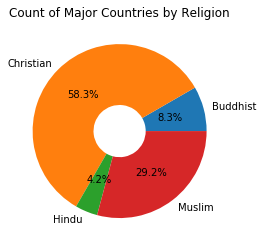

In [6]:
# pie plot religions by count


y=in_df.groupby(["Religion"]).size()

fig1, ax1=plt.subplots()
plt.title("Count of Major Countries by Religion")
plt.pie(y,labels=y.index,wedgeprops=dict(width=.7),autopct='%2.1f%%')
plt.show()


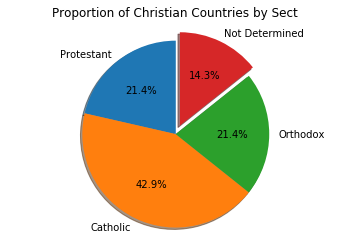

In [7]:
sun_ct=0
shi_ct=0
mus_ct=0
pro_ct=0
cat_ct=0
ort_ct=0
chr_ct=0

for index, row in in_df.iterrows():
    rel=in_df.iloc[index,9]
    sect=in_df.iloc[index,10]
    if rel=="Muslim":
        if in_df.iloc[index,10]=="Sunni":
            sun_ct+=1
        elif in_df.iloc[index,10]=="Shia":
            shi_ct+=1
        else: 
            mus_ct +=1
    elif rel=="Christian":
        if in_df.iloc[index,10]=="Protestant":
            pro_ct+=1
        elif in_df.iloc[index,10]=="Catholic":
            cat_ct+=1
        elif in_df.iloc[index,10]=="Orthodox":
            ort_ct+=1
        else: 
            chr_ct +=1


labels="Protestant","Catholic","Orthodox","Not Determined"            
sizes=[pro_ct,cat_ct,ort_ct,chr_ct]
explode=(0,0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct="%2.1f%%",shadow=True,startangle=90)
plt.title("Proportion of Christian Countries by Sect")
ax1.axis('equal')
plt.show()


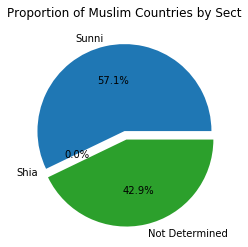

In [8]:
labels="Sunni","Shia","Not Determined"
sizes=[sun_ct,shi_ct,mus_ct]
explode=(0,0,.1)

fig1, ax1 = plt.subplots()
plt.title("Proportion of Muslim Countries by Sect")
ax1.pie(sizes,explode=explode,labels=labels,autopct="%2.1f%%")
plt.show()


Correlation : -0.8218583953936821
Slope : -1.1239755369762274 and Intercept : 122.90973614115458


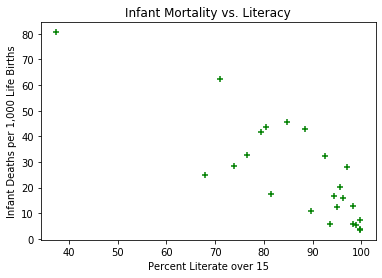

In [28]:
plt.scatter(in_df["Literacy"],in_df["Infant_Mort"],color='g',marker='+')
plt.title("Infant Mortality vs. Literacy")
plt.xlabel("Percent Literate over 15")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[0,9]}")
slope=st.linregress(in_df["Literacy"],in_df["Infant_Mort"]).slope
intercept=st.linregress(in_df["Literacy"],in_df["Infant_Mort"]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

Correlation : 0.570304654853864


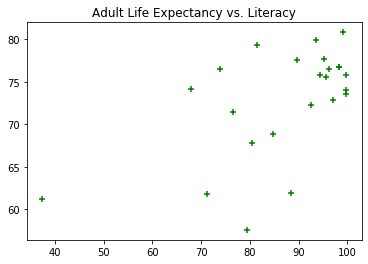

In [10]:
plt.scatter(in_df["Literacy"],in_df["Adj_LE"],color='g',marker='+')
plt.title("Adult Life Expectancy vs. Literacy")
print(f"Correlation : {cor_mat.iloc[0,12]}")

Correlation : -0.8312495829472519
Slope : -6.555028571428573 and Intercept : 110.78245714285717


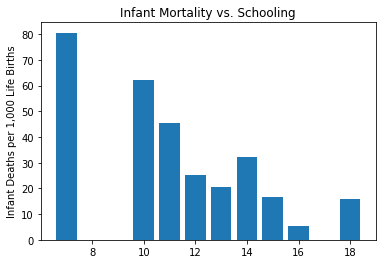

In [29]:
plt.bar(in_df["Schooling"],in_df["Infant_Mort"])
plt.title("Infant Mortality vs. Schooling")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[1,9]}")
slope=st.linregress(in_df["Schooling"],in_df["Infant_Mort"]).slope
intercept=st.linregress(in_df["Schooling"],in_df["Infant_Mort"]).intercept
print(f"Slope : {slope} and Intercept : {intercept}")

Correlation : 0.6896284453721567


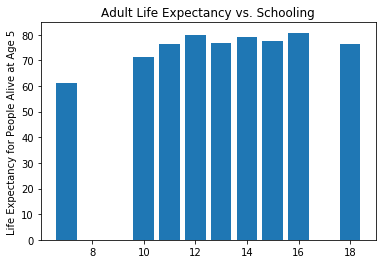

In [12]:
plt.bar(in_df["Schooling"],in_df["Adj_LE"])
plt.title("Adult Life Expectancy vs. Schooling")
plt.ylabel("Life Expectancy for People Alive at Age 5")
print(f"Correlation : {cor_mat.iloc[1,12]}")

Correlation : -0.4433391886359987


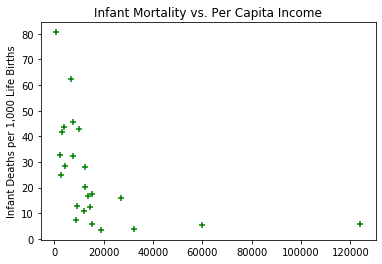

In [13]:
plt.scatter(in_df["Per_Cap_Inc_2017"],in_df["Infant_Mort"],color='g',marker='+')
plt.title("Infant Mortality vs. Per Capita Income")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[2,9]}")

Correlation : 0.4515846810110764


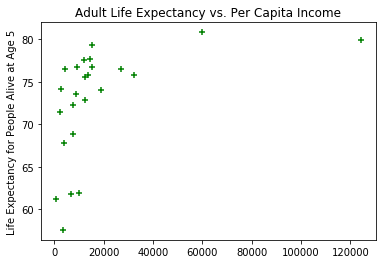

In [14]:
plt.scatter(in_df["Per_Cap_Inc_2017"],in_df["Adj_LE"],color='g',marker='+')
plt.title("Adult Life Expectancy vs. Per Capita Income")
plt.ylabel("Life Expectancy for People Alive at Age 5")
print(f"Correlation : {cor_mat.iloc[2,12]}")

Correlation : 0.4964235592484579


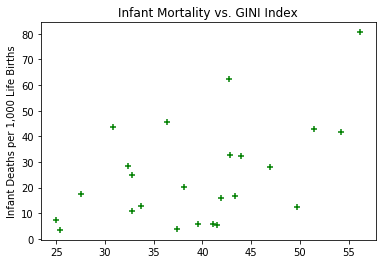

In [15]:
plt.scatter(in_df["GINI"],in_df["Infant_Mort"],color='g',marker='+')
plt.title("Infant Mortality vs. GINI Index")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[3,9]}")

Correlation : -0.5102366456661969


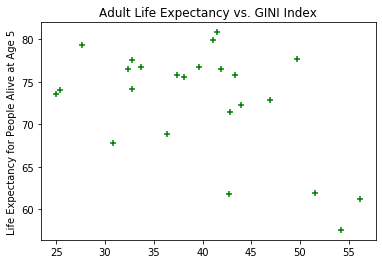

In [16]:
plt.scatter(in_df["GINI"],in_df["Adj_LE"],color='g',marker='+')
plt.title("Adult Life Expectancy vs. GINI Index")
plt.ylabel("Life Expectancy for People Alive at Age 5")
print(f"Correlation : {cor_mat.iloc[3,12]}")

Correlation : -0.33333438857799585


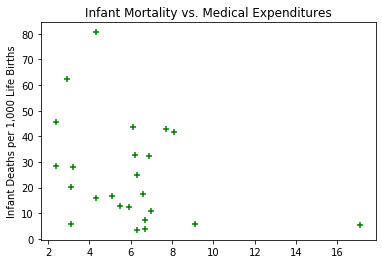

In [17]:
plt.scatter(in_df["Medical_Exp"],in_df["Infant_Mort"],color='g',marker='+')
plt.title("Infant Mortality vs. Medical Expenditures")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[4,9]}")

Correlation : 0.17021581140894443


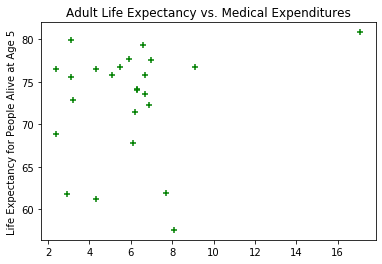

In [18]:
plt.scatter(in_df["Medical_Exp"],in_df["Adj_LE"],color='g',marker='+')
plt.title("Adult Life Expectancy vs. Medical Expenditures")
plt.ylabel("Life Expectancy for People Alive at Age 5")
print(f"Correlation : {cor_mat.iloc[4,12]}")

Correlation : -0.7803639829958389


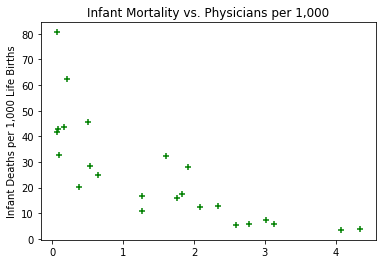

In [19]:
plt.scatter(in_df["Doctors"],in_df["Infant_Mort"],color='g',marker='+')
plt.title("Infant Mortality vs. Physicians per 1,000")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[5,9]}")

Correlation : 0.607018740776397


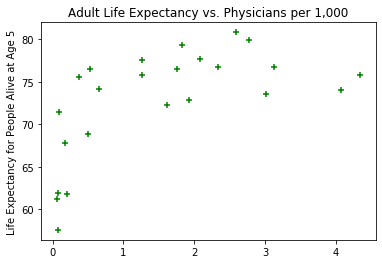

In [20]:
plt.scatter(in_df["Doctors"],in_df["Adj_LE"],color='g',marker='+')
plt.title("Adult Life Expectancy vs. Physicians per 1,000")
plt.ylabel("Life Expectancy for People Alive at Age 5")
print(f"Correlation : {cor_mat.iloc[5,12]}")

Correlation : -0.518386331740666


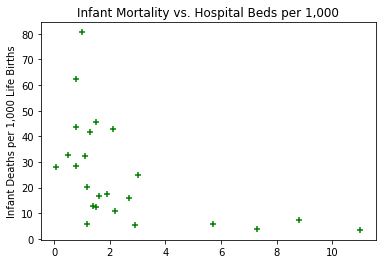

In [21]:
plt.scatter(in_df["Hosp_Beds"],in_df["Infant_Mort"],color='g',marker='+')
plt.title("Infant Mortality vs. Hospital Beds per 1,000")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[6,9]}")

Correlation : 0.20624575829338962


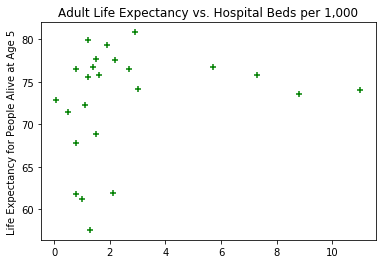

In [22]:
plt.scatter(in_df["Hosp_Beds"],in_df["Adj_LE"],color='g',marker='+')
plt.title("Adult Life Expectancy vs. Hospital Beds per 1,000")
plt.ylabel("Life Expectancy for People Alive at Age 5")
print(f"Correlation : {cor_mat.iloc[6,12]}")

In [23]:
# group by religion and print bar chart of average infant mortality by religion
rel_df=in_df.groupby(["Religion"]).mean()
rel_std=in_df.groupby(["Religion"]).std()
rel_im=rel_df["Infant_Mort"]
rel_im_std=rel_std["Infant_Mort"]
rel_al=rel_df["Adj_LE"]
rel_al_std=rel_std["Adj_LE"]
print(rel_im)
print(rel_im_std)
print(rel_al)
print(rel_al_std)

# once larger sample, look at box and whisker plot

Religion
Buddhist     44.650000
Christian    26.750000
Hindu        25.100000
Muslim       15.942857
Name: Infant_Mort, dtype: float64
Religion
Buddhist      1.343503
Christian    23.798764
Hindu              NaN
Muslim        7.240593
Name: Infant_Mort, dtype: float64
Religion
Buddhist     68.350000
Christian    70.957143
Hindu        74.200000
Muslim       77.442857
Name: Adj_LE, dtype: float64
Religion
Buddhist     0.777817
Christian    7.248099
Hindu             NaN
Muslim       1.593588
Name: Adj_LE, dtype: float64


Correlation : -0.5683633990163331


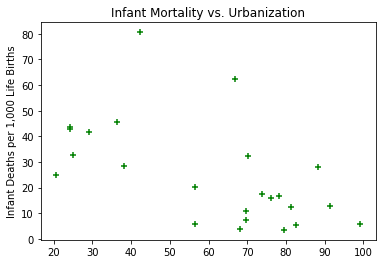

In [24]:
plt.scatter(in_df["Urbanization"],in_df["Infant_Mort"],color='g',marker='+')
plt.title("Infant Mortality vs. Urbanization")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[7,9]}")

Correlation : 0.5994981448600238


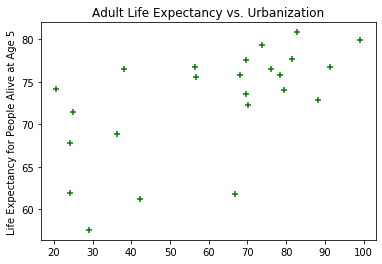

In [25]:
plt.scatter(in_df["Urbanization"],in_df["Adj_LE"],color='g',marker='+')
plt.title("Adult Life Expectancy vs. Urbanization")
plt.ylabel("Life Expectancy for People Alive at Age 5")
print(f"Correlation : {cor_mat.iloc[7,12]}")

Correlation : -0.6713226095229032


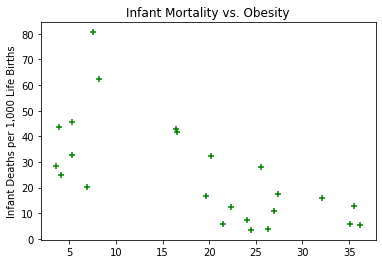

In [26]:
plt.scatter(in_df["Obseity"],in_df["Infant_Mort"],color='g',marker='+')
plt.title("Infant Mortality vs. Obesity")
plt.ylabel("Infant Deaths per 1,000 Life Births")
print(f"Correlation : {cor_mat.iloc[8,9]}")

Correlation : 0.5376831053155929


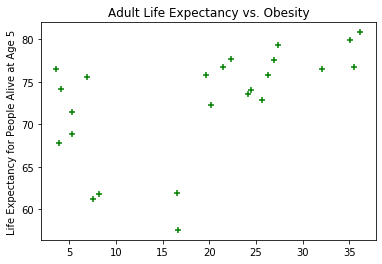

In [27]:
plt.scatter(in_df["Obseity"],in_df["Adj_LE"],color='g',marker='+')
plt.title("Adult Life Expectancy vs. Obesity")
plt.ylabel("Life Expectancy for People Alive at Age 5")
print(f"Correlation : {cor_mat.iloc[8,12]}")